In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
def calc_PIC_t(system_name):               

    colnames = []
    for g in np.arange(1.5,5.1,0.1):
        colnames.append('r_'+str(g))
    PFASframes = []                        # each element of the list contains the dataframe for a individual simulation replicate
    waterframes = []
    for i in range(1,9):
        PFASframes.append(pd.read_csv(str(i)+system_name+'tstp_nPFAS_r.txt',delimiter=" ",names=colnames))
        waterframes.append(pd.read_csv(str(i)+system_name+'tstp_WATER_r.txt',delimiter=" ",names=colnames))

    
    N_PFA = 100
    N_water = 22954

    P_v_t = []      #contains np arrays where each array belongs to a particular r, and contains the the time evolution of the PFAS for the r
    W_v_t = []
    P_b_t = []
    W_b_t = []
    PIC_t = []

    for k in range(8):
        PIC_t_d=[]
        for i in range(PFASframes[k].shape[1]):
            print(PFASframes[k].shape[1])
            P_t_i = PFASframes[k].iloc[:,i].to_numpy()     
            P_b_i = N_PFA - P_t_i
            W_t_i = waterframes[0].iloc[:,i].to_numpy()
            W_b_i = N_water - W_t_i
            PIC= P_t_i - (W_t_i*(P_b_i/W_b_i))           #is an array which contanis the time evolution of the PIC at a particular r where i is the index for that r
            PIC_t_d.append(PIC)      #this is a list of the time evolution of PICs at all r
            PIC_t_array = np.array(PIC_t_d)      
        PIC_t.append(PIC_t_array)         #each element of this list is a numpy array , which the first index represents variation in r and the 2nd index represenst variatoion in time
    PIC_array = np.array(PIC_t) 
    mean_PIC_t_lst=[]
    std_PIC_t_lst=[]
    ste_PIC_t_lst=[]
    for i in range(0,PIC_array.shape[1],5):
        mean_PIC_t=np.mean(PIC_array[:,i,:], axis=0)
        mean_PIC_t_lst.append(mean_PIC_t)
        std_PIC_t=np.std(PIC_array[:,i,:], axis=0)
        std_PIC_t_lst.append(std_PIC_t)  
        ste_PIC_t=stats.sem(PIC_array[:,i,:], axis=0, ddof=1)   
        ste_PIC_t_lst.append(ste_PIC_t)                          
        
    mean_PIC_t_arr= np.array(mean_PIC_t_lst)
    np.savetxt(system_name+'mean_PIC(t)_rs.txt', mean_PIC_t_arr)
    ste_PIC_t_arr=np.array(ste_PIC_t_lst)
    np.savetxt(system_name+'ste_PIC(t)_rs.txt', ste_PIC_t_arr)

36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
3

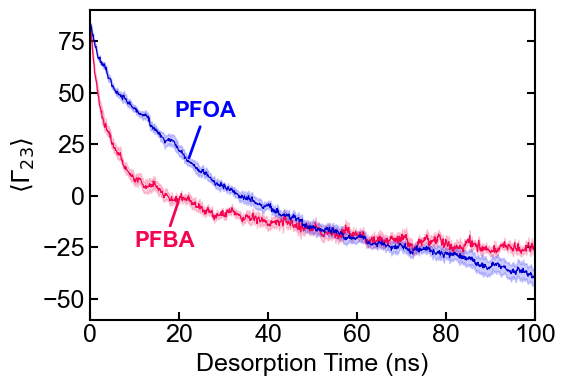

In [26]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.size'] = 18

system_name = '_C3_desorption_'
calc_PIC_t(system_name)
n_frames = np.arange(1, 1001, dtype=float)
t_step = 0.1 ##nano
t_frame = t_step*n_frames
time_ns =np.arange(1,1001,1)
mean_PIC_t =pd.read_csv(system_name+'mean_PIC(t)_rs.txt',delimiter=" ",names=time_ns)
ste_PIC_t =pd.read_csv(system_name+'ste_PIC(t)_rs.txt',delimiter=" ",names=time_ns)

color_HFBMA_PFBA = plt.cm.seismic(np.linspace(0.2, 1.2, 4))
color_HFBMA_PFOA = plt.cm.terrain(np.linspace(0.0, 0.14, 4))


for i in [7]:   #index 7 corresponds to 3 nm from the graphene
    PFBA_desorption_kinetics = np.array(mean_PIC_t.iloc[i,:])
    PFBA_ste_dev = np.array(ste_PIC_t.iloc[i,:])

system_name = '_C7_desorption_'
calc_PIC_t(system_name)
n_frames = np.arange(1, 1001, dtype=float)
t_step = 0.1 ##nano
t_frame = t_step*n_frames
time_ns =np.arange(1,1001,1)
mean_PIC_t =pd.read_csv(system_name+'mean_PIC(t)_rs.txt',delimiter=" ",names=time_ns)
ste_PIC_t =pd.read_csv(system_name+'ste_PIC(t)_rs.txt',delimiter=" ",names=time_ns)
for i in [7]:   #index 7 corresponds to 3 nm from the graphene
    PFOA_desorption_kinetics = np.array(mean_PIC_t.iloc[i,:])
    PFOA_ste_dev = np.array(ste_PIC_t.iloc[i,:])


fig, axs = plt.subplots(figsize =(6,4.2))
axs.plot(t_frame,PFBA_desorption_kinetics,0.7,color='xkcd:pink red',linewidth=0.9,label="PFBA")
axs.fill_between(t_frame, PFBA_desorption_kinetics+PFBA_ste_dev, PFBA_desorption_kinetics-PFBA_ste_dev,color='xkcd:pink red',alpha=0.2)
axs.plot(t_frame,PFOA_desorption_kinetics,color='mediumblue',linewidth=0.9,label="PFOA")
axs.fill_between(t_frame, PFOA_desorption_kinetics+PFOA_ste_dev, PFOA_desorption_kinetics-PFOA_ste_dev,color='blue',alpha=0.2)
axs.set_xlim(0, 100)
axs.set_ylim(-60, 90)
plt.annotate('PFBA', 
             xy=(20, PFBA_desorption_kinetics[200]),  # Pointing to this position
             color='xkcd:pink red',
             fontsize=16,
             fontweight='bold',
             xytext=(10, -25),  # Place the text here to avoid overlap
             arrowprops=dict(arrowstyle='-', color='xkcd:pink red', lw=2,  # Blue, bold line
                             ))  # Shorter line
plt.annotate('PFOA', 
             xy=(22, PFOA_desorption_kinetics[220]),  # Pointing to this position
             color='blue',
             fontsize=16,
             fontweight='bold',
             xytext=(19, 38),  # Place the text here to avoid overlap
             arrowprops=dict(arrowstyle='-', color='blue', lw=2,  # Blue, bold line
                             ))  # Shorter line
axs.set_xlabel('Desorption Time (ns)')
for spine in axs.spines.values():
    spine.set_linewidth(1.5)
axs.tick_params(axis='y', which='both', direction='in', left=True, right=True,length=6,width=1.5)
axs.tick_params(axis='x', which='both', direction='in', left=True, right=True,length=6,width=1.5)

plt.ylabel(r'$\langle \Gamma_{23} \rangle$') 
plt.tight_layout()
#fig.legend(loc='center right', fontsize="10")
plt.savefig("Desorption-rate-v2.png",dpi=500)
plt.show()